In [29]:
import warnings
warnings.filterwarnings("ignore")

import requests
import numpy as np
import pandas as pd
import geopandas as gpd # GeoPandas library for spatial analytics
from shapely.geometry import shape

from datetime import datetime, timedelta

from glob import glob
import os.path

In [30]:
files = os.path.join("../Citibike/data/*.csv")
#print(files)
files = glob(files)
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
df

,station_id,num_bikes_disabled,legacy_id,is_installed,eightd_has_available_keys,last_reported,is_renting,num_docks_disabled,station_status,is_returning,num_bikes_available,num_ebikes_available,num_docks_available,valet,eightd_active_station_services
0,72,0,72,0,False,1656077952,0,0,out_of_service,0,0,0,55,NaN,NaN
1,79,2,79,1,False,1656543069,1,0,active,1,9,0,21,NaN,NaN
2,82,2,82,1,False,1656542372,1,0,active,1,25,1,0,NaN,NaN
3,83,3,83,1,False,1656543103,1,0,active,1,42,0,17,NaN,NaN
4,116,0,116,0,False,86400,0,0,out_of_service,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40664,4824,0,4824,0,False,86400,0,0,out_of_service,0,0,0,0,NaN,NaN
40665,4826,0,4826,0,False,86400,0,0,out_of_service,0,0,0,0,NaN,NaN
40666,4827,0,4827,0,False,86400,0,0,out_of_service,0,0,0,0,NaN,NaN
40667,4830,6,4830,1,False,1656530675,1,0,active,1,4,0,37,NaN,NaN


In [31]:
df.dtypes

station_id                         int64
num_bikes_disabled                 int64
legacy_id                          int64
is_installed                       int64
eightd_has_available_keys           bool
last_reported                      int64
is_renting                         int64
num_docks_disabled                 int64
station_status                    object
is_returning                       int64
num_bikes_available                int64
num_ebikes_available               int64
num_docks_available                int64
valet                             object
eightd_active_station_services    object
dtype: object

In [32]:
df['last_reported'][1]

1656543069

In [33]:
#epoch time to timestamp
time= []
for i in range(len(df)):
    time.append(datetime.fromtimestamp(df['last_reported'][i])) 
df['date_time'] = time

In [34]:
# clean out the data with weird time
df = df[df['date_time']>'2022-1-1']

In [35]:
df['date_time'].max()

Timestamp('2022-06-29 20:20:03')

In [36]:
df['station_status'].unique()

array(['out_of_service', 'active'], dtype=object)

In [37]:
# Care only about the active station
df_active = df[df['station_status']=='active']

In [38]:
# create time difference

all_station_dif = []
all_station = list(df_active['station_id'].unique())

for Station_id in all_station:
    station_df = df_active[df_active['station_id'] == Station_id]
    station_df = station_df.sort_values(by='date_time')
    shift_station_df = station_df['date_time'].shift(1,axis='rows')
    all_station_dif.append(station_df)
    
    def getDifference(row):
        first_date = row['date_time']
        second_date = shift_station_df[row.name]
        return first_date - second_date

    station_df['Difference'] = station_df.apply(getDifference, axis = 1)

In [39]:
all_df = pd.concat(all_station_dif)
all_df
# all_df['Difference'].max()
# all_df[all_df['station_id']==79]
# all_df[all_df['Difference']>]

,station_id,num_bikes_disabled,legacy_id,is_installed,eightd_has_available_keys,last_reported,is_renting,num_docks_disabled,station_status,is_returning,num_bikes_available,num_ebikes_available,num_docks_available,valet,eightd_active_station_services,date_time,Difference
20337,79,2,79,1,False,1656526960,1,0,active,1,9,0,22,NaN,NaN,2022-06-29 14:22:40,NaT
37282,79,2,79,1,False,1656528505,1,0,active,1,12,2,19,NaN,NaN,2022-06-29 14:48:25,0 days 00:25:45
16948,79,2,79,1,False,1656529230,1,0,active,1,14,3,17,NaN,NaN,2022-06-29 15:00:30,0 days 00:12:05
38976,79,2,79,1,False,1656530188,1,0,active,1,12,0,19,NaN,NaN,2022-06-29 15:16:28,0 days 00:15:58
27115,79,2,79,1,False,1656530188,1,0,active,1,12,0,19,NaN,NaN,2022-06-29 15:16:28,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38644,4439,0,4439,1,False,1656527234,1,0,active,1,1,0,16,NaN,NaN,2022-06-29 14:27:14,0 days 00:00:00
40338,4439,0,4439,1,False,1656527234,1,0,active,1,1,0,16,NaN,NaN,2022-06-29 14:27:14,0 days 00:00:00
8142,4439,0,4439,1,False,1656533539,1,0,active,1,0,0,17,NaN,NaN,2022-06-29 16:12:19,0 days 01:45:05
3058,4439,0,4439,1,False,1656535484,1,0,active,1,0,0,17,NaN,NaN,2022-06-29 16:44:44,0 days 00:32:25


In [40]:
len(all_df)

38591

In [42]:
#transfer the time difference to minute 
all_df['dif_min'] = all_df['Difference'] / np.timedelta64(1, 'm')

# Get the highest time difference
all_df[all_df['dif_min']==all_df['dif_min'].max()]

,station_id,num_bikes_disabled,legacy_id,is_installed,eightd_has_available_keys,last_reported,is_renting,num_docks_disabled,station_status,is_returning,num_bikes_available,num_ebikes_available,num_docks_available,valet,eightd_active_station_services,date_time,Difference,dif_min
6184,4141,0,4141,1,False,1656546200,1,0,active,1,4,0,15,NaN,NaN,2022-06-29 19:43:20,0 days 16:03:47,963.783333


In [43]:
#define the whole capacity of each station
all_df['All_dock'] = all_df['num_docks_available'] + all_df['num_bikes_available'] 

In [44]:
# difference > 0, get rid of the error dataset
all_df_sel = all_df[all_df['dif_min']>0]
len(all_df[all_df['dif_min']==0])/len(all_df)

0.3184421238112513

# Always Full Station

In [45]:
all_df_sel['Empty_or_not'] = ((all_df_sel['All_dock']-all_df_sel['num_bikes_available']))/all_df_sel['All_dock']
all_df_sel['Full_or_not'] = 1- all_df_sel['Empty_or_not']
all_df_sel

,station_id,num_bikes_disabled,legacy_id,is_installed,eightd_has_available_keys,last_reported,is_renting,num_docks_disabled,station_status,is_returning,num_bikes_available,num_ebikes_available,num_docks_available,valet,eightd_active_station_services,date_time,Difference,dif_min,All_dock,Empty_or_not,Full_or_not
37282,79,2,79,1,False,1656528505,1,0,active,1,12,2,19,NaN,NaN,2022-06-29 14:48:25,0 days 00:25:45,25.750000,31,0.612903,0.387097
16948,79,2,79,1,False,1656529230,1,0,active,1,14,3,17,NaN,NaN,2022-06-29 15:00:30,0 days 00:12:05,12.083333,31,0.548387,0.451613
38976,79,2,79,1,False,1656530188,1,0,active,1,12,0,19,NaN,NaN,2022-06-29 15:16:28,0 days 00:15:58,15.966667,31,0.612903,0.387097
33893,79,2,79,1,False,1656531725,1,0,active,1,10,0,21,NaN,NaN,2022-06-29 15:42:05,0 days 00:25:37,25.616667,31,0.677419,0.322581
8474,79,2,79,1,False,1656532062,1,0,active,1,10,0,21,NaN,NaN,2022-06-29 15:47:42,0 days 00:05:37,5.616667,31,0.677419,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,4873,1,4873,1,False,1656544425,1,0,active,1,1,0,15,NaN,NaN,2022-06-29 19:13:45,0 days 00:35:56,35.933333,16,0.937500,0.062500
6778,4873,1,4873,1,False,1656546077,1,0,active,1,2,1,14,NaN,NaN,2022-06-29 19:41:17,0 days 00:27:32,27.533333,16,0.875000,0.125000
9836,4439,0,4439,1,False,1656527234,1,0,active,1,1,0,16,NaN,NaN,2022-06-29 14:27:14,0 days 04:13:25,253.416667,17,0.941176,0.058824
8142,4439,0,4439,1,False,1656533539,1,0,active,1,0,0,17,NaN,NaN,2022-06-29 16:12:19,0 days 01:45:05,105.083333,17,1.000000,0.000000


<AxesSubplot:>

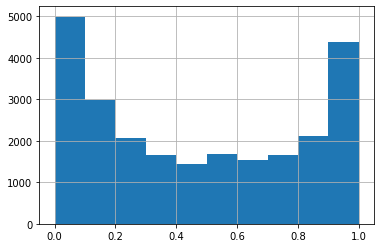

In [46]:
all_df_sel['Full_or_not'].hist()

In [47]:
all_df_sel

,station_id,num_bikes_disabled,legacy_id,is_installed,eightd_has_available_keys,last_reported,is_renting,num_docks_disabled,station_status,is_returning,num_bikes_available,num_ebikes_available,num_docks_available,valet,eightd_active_station_services,date_time,Difference,dif_min,All_dock,Empty_or_not,Full_or_not
37282,79,2,79,1,False,1656528505,1,0,active,1,12,2,19,NaN,NaN,2022-06-29 14:48:25,0 days 00:25:45,25.750000,31,0.612903,0.387097
16948,79,2,79,1,False,1656529230,1,0,active,1,14,3,17,NaN,NaN,2022-06-29 15:00:30,0 days 00:12:05,12.083333,31,0.548387,0.451613
38976,79,2,79,1,False,1656530188,1,0,active,1,12,0,19,NaN,NaN,2022-06-29 15:16:28,0 days 00:15:58,15.966667,31,0.612903,0.387097
33893,79,2,79,1,False,1656531725,1,0,active,1,10,0,21,NaN,NaN,2022-06-29 15:42:05,0 days 00:25:37,25.616667,31,0.677419,0.322581
8474,79,2,79,1,False,1656532062,1,0,active,1,10,0,21,NaN,NaN,2022-06-29 15:47:42,0 days 00:05:37,5.616667,31,0.677419,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,4873,1,4873,1,False,1656544425,1,0,active,1,1,0,15,NaN,NaN,2022-06-29 19:13:45,0 days 00:35:56,35.933333,16,0.937500,0.062500
6778,4873,1,4873,1,False,1656546077,1,0,active,1,2,1,14,NaN,NaN,2022-06-29 19:41:17,0 days 00:27:32,27.533333,16,0.875000,0.125000
9836,4439,0,4439,1,False,1656527234,1,0,active,1,1,0,16,NaN,NaN,2022-06-29 14:27:14,0 days 04:13:25,253.416667,17,0.941176,0.058824
8142,4439,0,4439,1,False,1656533539,1,0,active,1,0,0,17,NaN,NaN,2022-06-29 16:12:19,0 days 01:45:05,105.083333,17,1.000000,0.000000


In [48]:
#Count the number of times that the station is 1 as full
Full_df = all_df_sel[all_df_sel['Full_or_not']==1]
Full_df_count = Full_df[['station_id','Full_or_not']].groupby('station_id').count()
Full_df_count = Full_df_count.rename(columns={'Full_or_not':'counts'}).reset_index()
Full_df_count.sort_values(by='counts')

# get the avg time of full station 
Full_df_avg = Full_df[['station_id','dif_min']].groupby('station_id').mean()
Full_df_avg = Full_df_avg.rename(columns={'dif_min':'avg_min'}).reset_index()
Full_df_avg.sort_values(by='avg_min')

Full_df_count_avg = Full_df_count.merge(Full_df_avg,how='left',on='station_id')

In [49]:
Full_df_count_avg = Full_df_count_avg.sort_values(by='avg_min')
Full_df_count_avg.tail(10)

,station_id,counts,avg_min
302,4367,1,91.200000
348,4550,3,95.966667
181,3399,3,99.666667
308,4379,3,107.866667
114,3105,6,114.908333
349,4568,1,144.283333
306,4374,1,152.266667
322,4422,1,164.450000
137,3220,1,219.483333
321,4418,1,234.383333


In [50]:
Full_df_count_avg = Full_df_count_avg.sort_values(by='counts')
Full_df_count_avg.tail(10)

,station_id,counts,avg_min
303,4369,17,15.812745
35,319,17,15.680392
130,3186,17,15.357843
196,3436,18,15.052778
115,3106,19,14.890351
240,3769,20,15.405000
10,217,20,16.221667
375,4690,22,15.145455
286,4320,22,15.196212
260,3904,23,15.293478


In [51]:
# see all the columns
pd.set_option('display.max_columns', None)

<AxesSubplot:xlabel='date_time'>

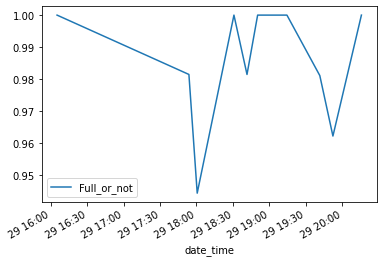

In [52]:
df_3105 = all_df_sel[all_df_sel['station_id']==3105]
df_3105[['Full_or_not','date_time']].plot(x='date_time',y='Full_or_not')

<AxesSubplot:xlabel='date_time'>

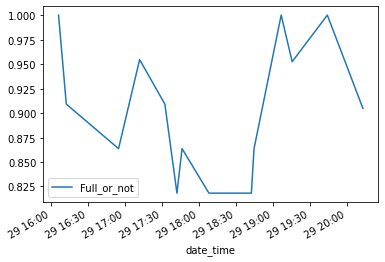

In [53]:
df_3399 = all_df_sel[all_df_sel['station_id']==3399]
df_3399[['Full_or_not','date_time']].plot(x='date_time',y='Full_or_not')

<AxesSubplot:xlabel='date_time'>

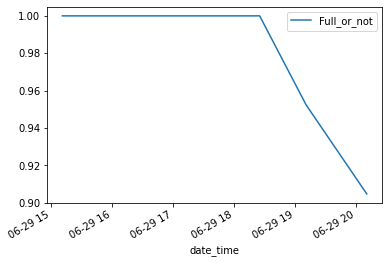

In [54]:
df_4379 = all_df_sel[all_df_sel['station_id']==4379]
df_4379[['Full_or_not','date_time']].plot(x='date_time',y='Full_or_not')

In [55]:
# df_3904['dif_min'].hist()

NameError: name 'df_3904' is not defined

In [ ]:
df_3377 = all_df_sel[all_df_sel['station_id']==3377]
df_3377[['Full_or_not','date_time']].plot(figsize=(12,8),x='date_time',y='Full_or_not')

In [ ]:
df_3377[df_3377['Full_or_not']==1]

<AxesSubplot:xlabel='date_time'>

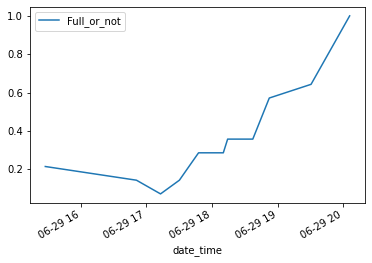

In [56]:
df_3278 = all_df_sel[all_df_sel['station_id']==3278]
df_3278[['Full_or_not','date_time']].plot('date_time','Full_or_not')

# Always Empty

In [57]:
#Count the number of times that the station is o as emptyness
Empty_df = all_df_sel[all_df_sel['Full_or_not']==0]
Empty_df_count = Empty_df[['station_id','Full_or_not']].groupby('station_id').count()
Empty_df_count = Empty_df_count.rename(columns={'Full_or_not':'counts'}).reset_index()
Empty_df_count.sort_values(by='counts')

# get the avg time of empty station 
Empty_df_avg = Empty_df[['station_id','dif_min']].groupby('station_id').mean()
Empty_df_avg = Empty_df_avg.rename(columns={'dif_min':'avg_min'}).reset_index()
Empty_df_avg.sort_values(by='avg_min')

Empty_df_count_avg = Empty_df_count.merge(Empty_df_avg,how='left',on='station_id')

In [69]:
Empty_df_count_avg = Empty_df_count_avg.sort_values(by='avg_min')
Empty_df_count_avg.tail(10)

,station_id,counts,avg_min
468,4629,1,157.333333
302,4032,2,160.566667
470,4636,2,160.991667
444,4555,2,176.525000
360,4173,1,195.600000
459,4607,2,211.425000
383,4228,3,256.438889
450,4566,1,359.033333
410,4322,1,372.783333
469,4634,1,374.266667


In [70]:
Empty_df_count_avg = Empty_df_count_avg.sort_values(by='counts')
Empty_df_count_avg.tail(10)

,station_id,counts,avg_min
15,359,8,14.700000
62,2012,8,12.275000
374,4207,9,33.357407
496,4764,9,40.494444
222,3785,9,15.038889
188,3592,9,14.522222
462,4612,10,18.078333
488,4712,11,17.542424
369,4191,13,15.379487
424,4438,19,14.645614


<AxesSubplot:xlabel='date_time'>

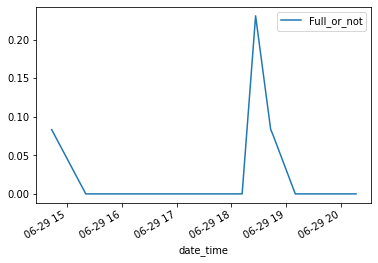

In [74]:
df_4207 = all_df_sel[all_df_sel['station_id']==4207]
df_4207[['Full_or_not','date_time']].plot('date_time','Full_or_not')

In [61]:
df_4228

,station_id,num_bikes_disabled,legacy_id,is_installed,eightd_has_available_keys,last_reported,is_renting,num_docks_disabled,station_status,is_returning,num_bikes_available,num_ebikes_available,num_docks_available,valet,eightd_active_station_services,date_time,Difference,dif_min,All_dock,Empty_or_not,Full_or_not
19818,4228,2,4228,1,False,1656528397,1,0,active,1,0,0,17,NaN,NaN,2022-06-29 14:46:37,0 days 08:55:17,535.283333,17,1.000000,0.000000
13039,4228,2,4228,1,False,1656541286,1,0,active,1,0,0,17,NaN,NaN,2022-06-29 18:21:26,0 days 03:34:49,214.816667,17,1.000000,0.000000
26596,4228,3,4228,1,False,1656542439,1,0,active,1,0,0,16,NaN,NaN,2022-06-29 18:40:39,0 days 00:19:13,19.216667,16,1.000000,0.000000
6261,4228,2,4228,1,False,1656548248,1,0,active,1,1,1,16,NaN,NaN,2022-06-29 20:17:28,0 days 01:36:49,96.816667,17,0.941176,0.058824


# Merge with Station Info data

In [62]:
station_info_link = 'https://gbfs.citibikenyc.com/gbfs/en/station_information.json'
with requests.get(station_info_link) as url:
    data = url.json()
    station_id_df = pd.DataFrame(data['data']['stations'])

In [63]:
station_id = station_id_df[['station_id','name','lat','lon','station_type','capacity']]
station_id

,station_id,name,lat,lon,station_type,capacity
0,72,W 52 St & 11 Ave,40.767272,-73.993929,classic,55
1,79,Franklin St & W Broadway,40.719116,-74.006667,classic,33
2,82,St James Pl & Pearl St,40.711174,-74.000165,classic,27
3,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,classic,62
4,116,W 17 St & 8 Ave,40.741776,-74.001497,classic,0
...,...,...,...,...,...,...
1695,4829,55 Dr & Maurice Ave,40.726100,-73.909170,classic,0
1696,4830,E 17 St & 2 Ave,40.734312,-73.983725,classic,47
1697,4834,30 Ave & 12 St,40.771717,-73.931593,classic,33
1698,4873,Amsterdam Ave & W 189 St,40.853188,-73.927158,classic,17


In [64]:
station_id[station_id['station_id']==4439]

,station_id,name,lat,lon,station_type,capacity


## Merge the main dataset

In [65]:
# all_df_sel_x = all_df_sel
# all_df_sel_x['station_id'] = all_df_sel_x['station_id'].astype(str)
# all_id_df = all_df_sel_x.merge(station_id, how='left',on='station_id') 
# all_id_df.to_csv('../output/citibike_station_time.csv')

In [66]:
# #check how many data with no station info
# all_id_df[all_id_df['name'].isnull()==True]

## Merge full and empty station counts

In [67]:
# Full_df_count['station_id'] = Full_df_count['station_id'].astype(str)
# full_id_df = Full_df_count.merge(station_id, how='left',on='station_id') 
# full_id_df.to_csv('../output/full_station_count.csv')

In [68]:
# Empty_df_count['station_id'] = Empty_df_count['station_id'].astype(str)
# empty_id_df = Empty_df_count.merge(station_id, how='left',on='station_id') 
# empty_id_df.to_csv('../output/empty_station_count.csv')